In [4]:
# Import main modules:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
import numpy as np

# <center>An Exploration into Numerical Computation Methods to Solve Scientific Modelling Problems</center>

# Abstract
 
<hr>

This report will present three topics, with relevance to a range of scientific disciplines, to explore different numerical methods computationally. Common mathematical concepts will be utilised to create simplified models and discuss the questions these scenarios pose. Randomness and probabilistic techniques will be applied to the popular 'travelling salesman' problem, differential equations will be used to model the mechanics of the Tacoma bridge and finally a method of image compression using linear algebra will be implemented. Skills in the Python programming language will be developed by creating functions to investigate and find optimal modelling solutions. The applications and possible extensions of the strategies used will be considered, in addition to their importance in the skill set of a modern scientist. 

# Introduction

<hr>

Modern technology has changed the landscape of science in the 21st century for good. A major reason for this is the dramatic rise in computational power [1] and the potential this holds. This report aims to take advantage of this new era of science and use computational methods to investigate interesting scientific problems. Mathematical modelling has long been an important tool used to investigate scientific phenomena, particularly in physics where concepts are naturally more abstract. In particular, there are many situations where an intuitive, analytical answer isn't possible and a different approach is required. Numerical analysis is a field of mathematics concerned with the development and analysis of methods for the numerical solution of practical problems [2]. In such methods, which will be used in this report, algorithms are used to approximate solutions. While this field is not new, it is only in the modern age that it has reached its full potential. The ability to computationally calculate exponentially higher iterations of an algorithm than by hand has had radical consequences for scientific investigations. Computation can now offer insights into areas of science previously out of reach.  


Our main aim is to expand upon the numerical modelling and programming skills learnt throughout this course using relevant scientific examples. We will require knowledge across many areas to create models which find the balance between the simplification of complex ideas and providing meaningful answers. We will consider both deterministic and stochastic models depending on the situation in question. There are many motivations for this report, but a major aspect is the importance of developing modelling skills for a future investigation or career. A recent review from the Government Office for Science and Council for Science and Technology highlighted the value of these skills across society, saying that computational modelling is essential for the UK's future productivity and competitiveness [3]. In terms of physics, it seems that every area now has a twinned computational field, such as computational astrophysics or fluid dynamics [4]. Furthermore, using the Python programming language makes this exercise even more valuable. The TIOBE index currently ranks Python within the top three most popular programming languages [5] and it is a staple for many large companies such as Google [6]. The value of gaining programming skills is clear, both within academia and wider society.


More specifically, this report will review three example cases based on real-world situations involving all areas of STEM. The first will be a version of the 'travelling salesman' problem. We will seek the shortest path between multiple cities that only passes through each city once. We will use a probabilistic technique known as simulated annealing to find an approximated solution for the optimal path. The second problem will look at the unusual 1940 collapse of the Tacoma Bridge - using differential equations to model its movement. We will explore the impact of the torsion angle and wind on the bridge's oscillations and eventual collapse. The final problem will attempt to compress images using linear algebra. Using pre-existing functions for singular value decomposition, or SVD, we will create a function to reduce the file size and noise of an image. The diversity of the techniques covered in this report make for an effective introduction to the value of computation in physics and science.

# The Travelling Salesman Problem

<hr>

Our first investigation will consider the so-called 'travelling salesman' problem, abbreviated to TSP from here. In the context of this report, this can be defined simply as: What is the shortest path that visits every given location exactly once and returns to the point of origin? We will take a list of 30 US state capitals and calculate the shortest possible route between them, according to the rules above. For a short route, say 3 cities, we could do this by hand - by calculating the length of each possible route and comparing them to find the shortest. However, as will be discussed later, once the number of cities increases to 30, this will no longer be practical. 

Before the era of modern communication technology, many professions required travel between multiple towns and cities to conduct business - including the namesake of this section, the travelling salesman. An efficient route between tens or hundreds of towns on a salesman's journey would no doubt be an important economic consideration for a company and its employees. An itinerary which avoided revisiting the same stops and decreased the time spent travelling would mean more time for finding prospective customers. Head offices would often use pins and string on a map to find a suitable solution and, throughout the 19th and early 20th centuries, many guidebooks were published to help a travelling salesman find the best route possible [7]. This lead many to question - is there a way to find the shortest possible route for any given tour? Researchers across mathematics, science and computing have studied this problem, leading to its current popularity.  It has been applied to projects across all scales - from mapping genomes to hunting for Earth-like planets. Interestingly, TSP-like tasks have also been used in neuropsychology as a test for identifying patients with brain damage [7]. Variations on the traditional TSP increase its relevance. For example, asymmetric TSPs exist where the distance or path may change depending on the direction of travel. This can be also be applied to other situations, such as with multiple 'salesmen' [8].

The practical applications of the TSP have made it relevant for many centuries, but there was not always a clear mathematical basis. The formalisation of this problem was developed in part by Euler's investigation of the 'Seven Bridges of Königsberg' in 1736. This involved finding a walk through the city of Königsberg by passing over each of its seven bridges exactly once. He proved this was not possible by abstracting the question to a graph structure, as shown below in Figure 1. 


<img src=https://upload.wikimedia.org/wikipedia/commons/9/96/K%C3%B6nigsberg_graph.svg style="display:block; margin-left:auto; margin-right:auto;" width="400">

*<center> Figure 1: Graph of the Königsberg bridge problem, where the nodes represent the land masses and the edges show the bridges [9]. </center>*


This laid the foundations for the field of graph theory, on which modern TSP research is based. Irish mathematician Hamilton expanded on this in 1856, using Hamiltonian cycles to create his Icosian Game - based on finding a route between the vertices of a dodecahedron [7]. The TSP, as used in this report, originated in the United States in the 1950s - in particular with the work of Dantzig, Fulkerson and Johnson on the 'cutting plane' method and 'branch and bound' algorithms [10]. It is only more recently that rapid progress has been made. This is partly due to the increase in computing power, as well as developments on the theory side [8]. The TSP is considered to be an NP-hard problem [7]. Mathematically, we can view it as a combinatorial optimization problem, where we aim to find an optimal object from a finite set of objects [11]. In our case, the optimal object is the shortest possible path between our given cities. The most obvious way to approach this problem would be through brute force, or finding the length of every possible path to see which is shortest. Using this approach for our list of 30 cities, the number of possible paths would equal the number of permutations, or 30!. This would prove unrealistic for even the best supercomputer to calculate. 

Many attempts have been made to solve the problem for increasingly larger numbers of cities. While progress has been made using exact algorithms, this has still not proven viable for many circumstances. Instead, a range of heuristic methods have been developed, where approximate solutions are found in more reasonable timescales [10]. In this report, we will use a heuristic optimisation method known as simulated annealing to solve our problem. This method provides a probabilistic way to approximate the best path that does not require testing every solution. This means we can find a solution within a reasonable computing time, although the solution will not necessarily be the optimum. The SA algorithm was inspired by the physical process of annealing in materials science. Here, the low energy states of a solid are found by melting the substance and lowering the temperature slowly. This allows the solid to reform in the ground state, or lowest energy configuration, of the particles. If this cooling is not done slowly, the resulting solid will not reach this optimum configuration of particles. Instead, it may get stuck in a 'locally optimal' structure. An example of this difference would be a clear crystal versus one with defects [12]. The application of this concept to the TSP was first used by Kirkpatrick, Gelatt Jr. and Vecchi in 1983 [13]. 


We will create our own simulated annealing function to solve our TSP. We will generate a random starting path between our given cities, $d_{old}$. From here, we consider some neighbouring path $d_{new}$. This will be found using pairwise exchange, where we swap the location of two cities along the path. We decide whether to accept this new path according to a probability $P$ given in Equation (1) below.



$$ P = e^{ - \left( d_{new} - d_{old}  \right) / T } \tag{1}$$



Here, we use a value $T$, which is a fictitious temperature named from the physical process described above. Linking to our physical analogy, we can consider the range of possible paths as an 'energy' landscape. The 'temperature' determines the likelihood of accepting or rejecting a new path from our random starting point. We start our function from a high temperature, where our algorithm will accept changes in path readily. We can then sample different paths across the landscape using Monte Carlo methods. This movement will prevent the program from getting 'stuck'. If all reductions in path length were accepted, such as in the hill climbing method, the algorithm would stop at the first local minimum it found in the energy landscape. This would equate to a shorter path length than we started with, but not necessarily the shortest possible length. The first minimum reached from our random starting point is unlikely to be the global minimum. By creating a function which can move away from certain solutions, we are more likely to find the shortest possible path length.

We then reduce the temperature according to a temperature schedule. This function determines the rate of temperature decrease, which is vital to the success of our cooling procedure. As mentioned, higher temperatures increase the chance of accepting a path change, according to Equation (1), which prevents the function falling into a local minimum. Decreasing the temperature too slowly will prolong finding a solution, but decreasing it too quickly will not allow the function to sample the full landscape of solutions. There are different types of schedule functions, e.g. linear or quadratic, but this report will use a simple exponential decay, as given below in Equation (2). 



$$T(t) = \alpha^t T_0 \tag{2}$$



$T_0$ is the starting 'temperature', $\alpha$ is the decay parameter and $t$ is time. The nature of an exponential decay means that the temperature will decrease rapidly, then slowly reach the minimum. This means path improvements will be accepted often in the beginning, then quickly drop as time passes. This provides some time for the algorithm to sample the landscape and remove any bias from its random starting point. Once the general area of the solution is found, the low probability prevents drastic change and allows the algorithm to find the true minimum. Our simulated annealing function should eventually settle on the lowest energy configuration - or the shortest path length - which we will visualise on a US map. The code for this function and the solution are given below. 

### Creating the Function

Our first section of code below will run some given code. This will load additional modules, import a US map image, create a list of cities and then define functions to create and display our path.

In [16]:
# Import additional modules:
import numpy.random as random  
import matplotlib.image as mpimg

# Import US map as image file:
import json
import copy

map = mpimg.imread("map.png") 

# Load list of US cities:
with open('capitals.json', 'r') as capitals_file:
    capitals = json.load(capitals_file)
capitals_list = list(capitals.items())
capitals_list = [(c[0], tuple(c[1])) for c in capitals_list]

# Define map functions:
def coord(path):
        _, coord = path
        return coord

def coords(path):
        _, coords = zip(*path)
        return coords
    
def show_path(path_, starting_city, w=35, h=15):
    path=coords(path_) 
    x, y = list(zip(*path))
    
    _, (x0, y0) = starting_city
    
    plt.imshow(map)
    plt.plot(x0, y0, 'y*', markersize=15)
    plt.plot(x + x[:1], y + y[:1])  
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])

Now, we will follow the approach outlined above to create a simulated annealing function. Within it, we will nestle four smaller functions to allow us build our algorithm. 

The first useful function will be the <b>temperature schedule</b>. As described above, this will control the probability of accepting a new path. The function takes a given temperature and returns a new temperature according to Equation (2). The next function creates a <b>random starting path</b>. This is achieved by generating a random number equivalent to the index of the a city on our `capitals_list`. If the city is not already on the path, it will be added until the required number of cities is found. The function takes a list of cities and the desired number of stops $N$ and outputs a random path. The next function defined is the <b>pairwise exchange</b> function. This allows two random cities to be swapped on a path. When given a path and two cities on that path, it will swap their indexes and return a new path with them swapped. The final mini-function is the <b> path length</b> function. This takes a path and finds its length. Initially, the path is adjusted to make sure the journey is looped - beginning and ending in the same city. Then, after extracting the coordinates of each city, Pythagoras' theorem is used to calculate the distance between each set of cities. This is summed and the path length is returned.

We will use these functions in our main <b>simulated annealing</b> function. For a given number of attempts, we will perform a pairwise exchange and probabilistically decide to accept or reject the new path. After completing this, the function will return arrays containing the obtained paths, path lengths and the temperature.

In [17]:
# Define the simulated annealing function:
def simulated_annealing(N=len(capitals_list), alpha=0.97, T0=1000, attempts=200):
    
    # Temperature schedule function:
    def temp_schedule(t, alpha=0.97, T0=1000):
        T = (alpha**t)*T0
        return T
    
    # Random starting path function:
    # Set default values as list of capitals and length of that list
    def random_path(no_of_cities = len(capitals_list), list_of_cities = capitals_list):
        # Create empty array for path
        path = []
        # Repeat until path is length required
        while len(path) < no_of_cities:
            # Generate random integer equal to index of a capital list city
            x = random.randint(0, no_of_cities)
            # Check if city is already in path, if not then add to list
            if list_of_cities[x] not in path:
                path.append(list_of_cities[x])
        return path
    
    # Function for pairwise exchange:
    def pairwise(initial_path, city1, city2):
        # Copy path
        new_path = list(initial_path)
        # Swap cities
        new_path[city1] = initial_path[city2]
        new_path[city2] = initial_path[city1]
        return new_path
    
    # Function for path length:
    def path_length(path):
        length = 0
        # Set path to include return to first location
        total_path = list(path) + [path[0]]
        # Use previous functions to pair up cities
        total_path = coords(total_path)
        pair = zip(total_path, total_path[1:])
        # Use pythagoras' theorem to calculate distance between cities
        for x in range(0, len(pair)):
            a = abs((pair[x][0][0])-(pair[x][1][0]))
            b = abs((pair[x][0][1])-(pair[x][1][1]))
            dist = np.sqrt((a**2)+(b**2))
           # Add obtained distance to total length
            length = length + dist
        return length
    
    # Define a path of desired length:
    path = random_path(no_of_cities = N)
    # Set initial parameters
    T = T0
    temp = []
    distance = []
    # Repeat algorithm for desired number of attempts
    for x in range(attempts):
        temp.append(T)
        length = path_length(path)
        # Generate random cities to swap
        city1 = random.randint(0, N)
        city2 = random.randint(0, N)
        # Use previous functions to swap cities + find length of new path
        new_path = pairwise(path, city1, city2)
        new_length = path_length(new_path)
        # Define probability to determine new path acceptance or rejection
        r = random.uniform(0, 1)
        P = np.exp(-(float((new_length)-(length)))/float(T))
        if P > r:
            path = list(new_path)
        distance.append(path_length(path)) 
        # Find new temperature according to schedule
        T = temp_schedule(t=x, alpha=alpha, T0=T0)
    return temp, distance, path

### Optimising the Function

Before we apply our function to our full problem, we can first consider how the parameters we select affect our results. As mentioned, our temperature schedule is vital in the success of our cooling process. In Equation (2), there are two variables we can alter for the best results. By increasing our starting temperature $T_0$, we give our algorithm a larger working space. This allows more control over the rate at which we decrease the temperature and, therefore, the acceptance rate. It is important that we keep the acceptance rate high for long enough to fully sample the solutions without moving away from found minima.

The other variable found in Equation (2) is the decay parameter $\alpha$. Below in Figure 2 there are log-scale plots showing the relationship between distance and temperature for different $\alpha$ values. We run the algorithm for 8 cities here to make the differences more clear. In Figure 2 we show some specific examples for illustration, but other values considered can be found in Appendix A, Figure A.1. We can see that for $\alpha = 0.8$ the algorithm finds shorter and shorter paths, without much variation, before settling on the solution. On the opposite side of the spectrum, for $\alpha = 0.99$ there is great variation in the found path length and the function does not seem to settle on a final solution. Our ideal temperature schedule should keep the acceptance rate high at first to explore the landscape of solutions, and then decrease exponentially to find the global minimum. From these two comparisons, we can see there is a balance to be found for the $\alpha$ variable. We want the parameter to be as close to 1 as possible, so that the temperature decreases slowly enough to explore the landscape of solutions properly. However, we need the function to settle on a solution within a reasonable timeframe and not move easily away from possible minima. Using the plots below and in Appendix A Figure A.1, $\alpha = 0.97$ shows effective variation in distance to show solutions explored but still with enough space to settle on a solution at the found minima within a reasonable timescle.


C:\Users\Study\Anaconda2\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in exp


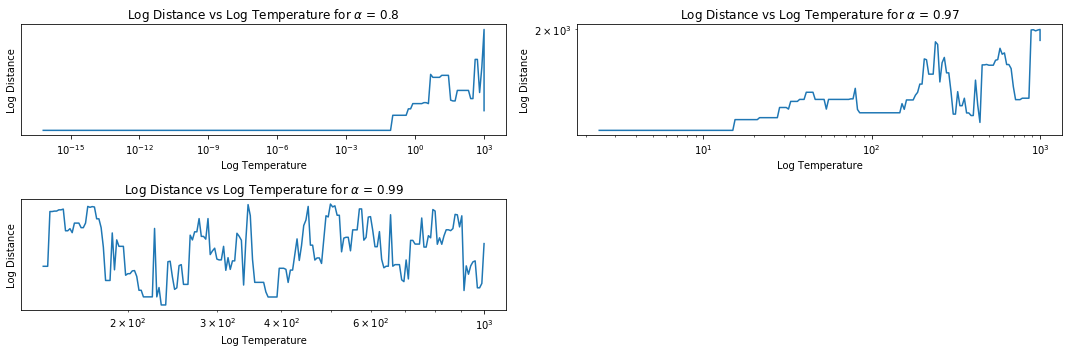

In [144]:
a = [0.8, 0.97, 0.99]
for x in range(0,3):
    plt.subplot(2,2,(x+1))
    temp, distance, path = simulated_annealing(alpha=a[x], N=8)
    plt.title('Log Distance vs Log Temperature for $\\alpha$ = ' + str(a[x]))
    plt.xlabel('Log Temperature')
    plt.xscale('log')
    plt.ylabel('Log Distance')
    plt.yscale('log')
    plt.plot(temp, distance)
plt.tight_layout()

*<center> Figure 2: Plots showing the obtained distance against temperature using log scales for $\alpha = $ 0.8, 0.97 and 0.99. </center>*


### Final Solution

Now we have considered the best parameters for our algorithm, we can find a solution to our problem. In the section of code below, we run our algorithm on the full list of cities 20 times and take the shortest overall path as our final solution. In Figure 3, we visualise our solution on a US map and print the obtained path and its length. Another consideration is the number of attempts, or time steps, to trial a new path. A greater number of attempts will give the algorithm more time to find the global minimum, but too many attempts won't reach a solution in reasonable timescale. Below in Figure 3, we use 3000 attempts as a compromise. In Appendix A, Figure A.2 a range of time steps are trialled to show the difference in the obtained result. There is a noticeable improvement in the path length between 200 and 1000 attempts but it was found that this difference was negligible beyond 3000 attempts. Therefore, this amount will balance efficiency with effectiveness. 

There are other possible ways that our method could be improved upon or changed. The temperature schedule could be further adapted to this specific model. The code itself could be improved to increase efficiency and speed so that the simulated annealing process could be applied over more attempts in the same running time. A consistent start/end city could be used to compare different methods more accurately. In spite of this, it is clear that a meaningful solution has been found that goes a long way towards answering the given question.


C:\Users\Study\Anaconda2\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in exp


The final shortest path length is 2227.932331348487.
The final shortest path is [(u'Salt Lake City', (204.0, 243.2)), (u'Denver', (293.6, 274.0)), (u'Oklahoma City', (392.8, 356.4)), (u'Little Rock', (469.2, 367.2)), (u'Des Moines', (447.6, 246.0)), (u'Saint Paul', (451.6, 186.0)), (u'Madison', (500.8, 217.6)), (u'Indianapolis', (548.0, 272.8)), (u'Columbus', (590.8, 263.2)), (u'Lansing', (563.6, 216.4)), (u'Albany', (702.0, 193.6)), (u'Boston', (738.4, 190.8)), (u'Providence', (735.2, 201.2)), (u'Hartford', (719.6, 205.2)), (u'Trenton', (698.8, 239.6)), (u'Harrisburg', (670.8, 244.0)), (u'Richmond', (673.2, 293.6)), (u'Raleigh', (662.0, 328.8)), (u'Columbia', (632.4, 364.8)), (u'Atlanta', (585.6, 376.8)), (u'Tallahassee', (594.8, 434.8)), (u'Montgomery', (559.6, 404.8)), (u'Nashville', (546.4, 336.8)), (u'Jackson', (501.6, 409.6)), (u'Baton Rouge', (489.6, 442.0)), (u'Austin', (389.2, 448.4)), (u'Phoenix', (179.6, 371.2)), (u'Sacramento', (68.4, 254.0)), (u'Salem', (80.0, 139.2)), (u'

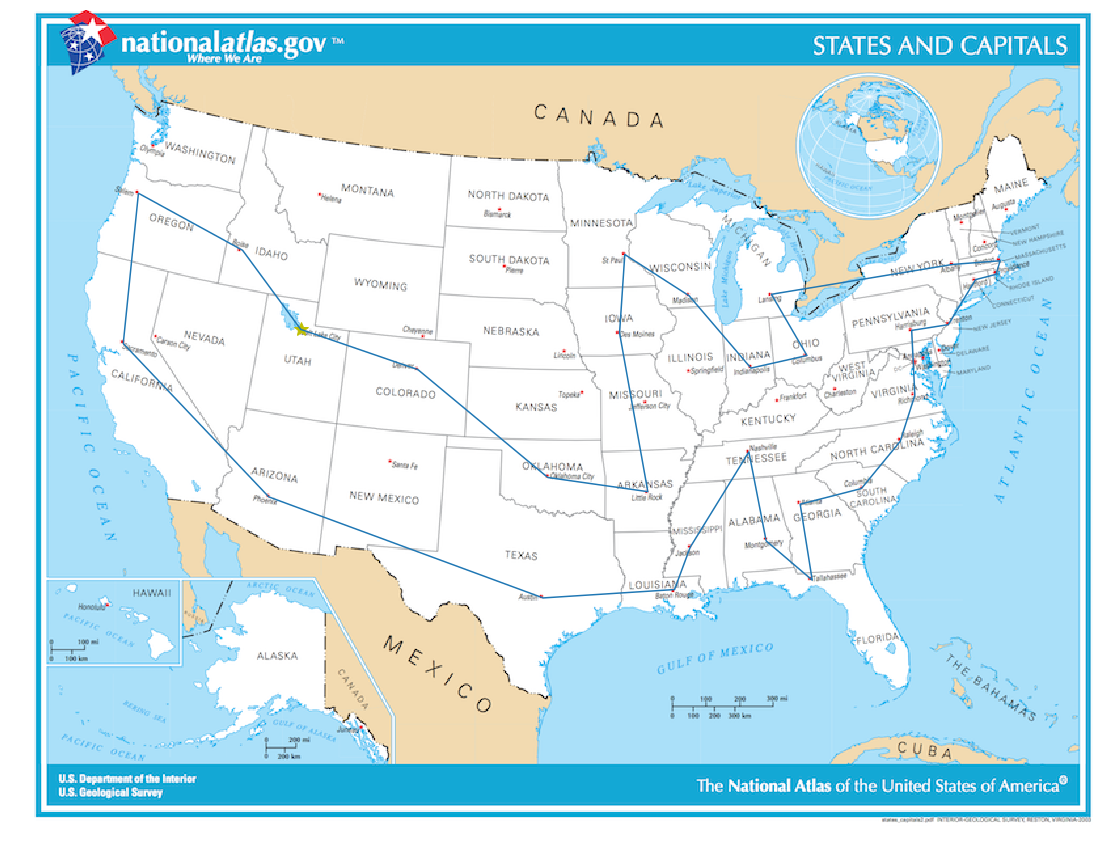

In [141]:
distances = []
paths = []
for x in range(20):
    temp, distance, path = simulated_annealing(N=len(capitals_list),attempts=3000)
    distances.append(distance[-1])
    paths.append(path)

best_distance = min(distances)
best_path = paths[np.argmin(distances)]
    
print('The final shortest path length is ' + str(best_distance) + '.')  
print('The final shortest path is ' + str(best_path) + '.')

show_path(best_path, best_path[0])

*<center> Figure 3: Plot showing the shortest found path between the given 30 cities mapped onto a US map. </center>*


# The Tacoma Bridge Problem

<hr>

On July 1st 1940, the Tacoma Narrows bridge in the US state of Washington opened to traffic. It spanned the Puget Sound and, at the time, was the third longest suspension bridge in the world [14]. Within a few months, the bridge dramatically collapsed. On the morning of November 7th 1940, eyewitnesses described the bridge as "swaying wildly" and "bouncing and twisting like a rollercoaster" before finally collapsing into the Puget Sound below [15]. The strong winds of the morning had caused the roadway to begin a "lateral twisting motion". At one point, the sidewalk on one side was 28 feet above that of the other side [16]. Below in Figure 3 is an image from this day before the collapse, showing the bizarre warps of the bridge. 

<img src=https://upload.wikimedia.org/wikipedia/commons/f/f0/Howard_Clifford_running_off_the_Tacoma_Narrows_Bridge_during_collapse%2C_Tacoma%2C_Washington_%284861196144%29.jpg width="400">

*<center> Figure 3: Image of Howard Clifford running off the Tacoma Narrows Bridge during collapse (Tacoma, Washington, November 7th 1940). [17]</center>*

This event has been enthusiastically investigated by the scientific and engineering communities since that day. Multiple causes for the violent oscillations of the bridge have been proposed, such as resonance created by a driving force matching the natural frequency of the bridge [18]. It is now considered to have been caused by aeroelastic flutter - where the high-speed wind was forced above and below the roadway and created vortices. Over time, this caused a vertical force leading to oscillations of the bridge itself [19]. This report aims to create a computational model of this event to gain an insight to the physics behind this fascinating scenario. We will look to model the motion of the bridge and investigate the influence of multiple factors, in particular the wind, on its oscillations. This will be achieved using differential equations and consideration of the McKenna-Tuama mathematical model, described more later. It will be important to see how a vertical wind force can cause torsional oscillations. This investigation has clear applications to the real world, as the stability of bridges is an important consideration in civil engineering. Even in the case of the Tacoma bridge, the physical causes of the collapse were accounted for during the design of the replacement bridge, which opened in 1950 [20]. Furthermore, using differential equations to create computational models of natural phenomena is widespread in the scientific community. 


To create our model, we can focus on a cross-sectional slice of the bridge to reduce the complexity of the problem, as shown below in Figure 4. We will base our investigation on the mathematical model developed by McKenna and Tuama [18].

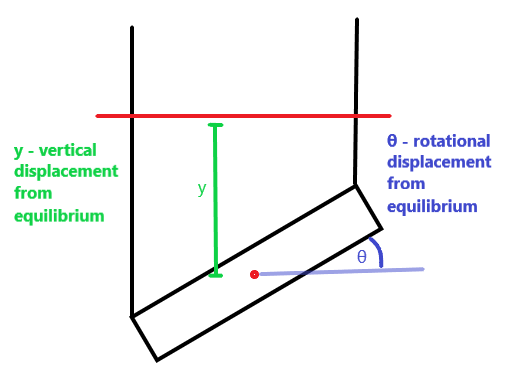

In [2]:
from IPython.display import Image
Image(filename="bridge.png")

*<center> Figure 4: Diagram showing the modelling scenario used in this report, namely the use of a cross-sectional slice of the bridge (self-drawn). </center>*
 
In Figure 4, we simplify our problem as a suspended roadway, supported by two cables. This cross-section allows us to focus on the variance in two parameters - the vertical displacement $y$ and the torsion angle $\theta$, as shown above. Considering this, we need to set up two equations - one to model $y$ and the other to model $\theta$. To create these equations of motion, we must consider how to model the forces effecting our variables - specifically the interaction between the gravitational force and the restoring force of the cables. One method could be to model the cables as springs according to Hooke's law, where $F = -kx$. This gives a linear response, where the restoring force of the cables is proportional to the displacement. However, McKenna and Tuama believed the cables would show more resistance on compression in reality - and create a smaller restoring force - than when extended. Therefore, we will use their suggested model for the cables, where the force acts according to Equation (3) below [18].

$$F(y) = \left(\frac{K}{a}\right)\left(e^{ay}-1\right)   \tag{3}$$

where $K$ is the spring constant and $a$ is a force parameter. Now, using this and Newton's law for the gravitational force, we can set up our equations of motion. We can use trigonometry to consider the vertical components of the restoring force only. This creates the model given below in Equations (4) and (5):

$$y'' = -dy' - \frac{K}{Ma}\left(e^{a(y-l\sin(\theta))} - 1 + e^{a(y+l\sin(\theta))} - 1 \right)  \tag{4}$$

$$\theta '' = -d\theta' + \frac{3\cos(\theta)}{l}\frac{K}{Ma}\left(e^{a(y-l\sin(\theta))} - e^{a(y+l\sin(\theta))} \right) \tag{5}$$

where $m$ is the mass, $l$ is the roadway width, $d$ is the dissipative constant and the remaining variables are as above.  While these equations allow us to model the bridge under normal conditions, we know that the wind was a contributing factor to the motion of the bridge. As mentioned, the aeroelastic flutter mechanism creates a vertical force, which we can model as acting according to Equation (6) below.

$$F_{wind} = A\sin(\omega t) \tag{6}$$

where $A$ is the amplitude of the wind force and $\omega$ is the frequency of the created oscillations. The sinusoidal nature of this force allows for the in the wind direction and strength in our model. Therefore, our final equations can be written as shown below in Equations (7) and (8).

$$y'' = -dy' - \frac{K}{Ma}\left(e^{a(y-l\sin(\theta))} - 1 + e^{a(y+l\sin(\theta))} - 1 \right) + \frac{A}{M}\sin(\omega t)  \tag{7}$$

$$\theta '' = -d\theta' + \frac{3\cos(\theta)}{l}\frac{K}{Ma}\left(e^{a(y-l\sin(\theta))} - e^{a(y+l\sin(\theta))} \right) \tag{8}$$

We have added our vertical wind force to the $y$ component however, it will impact $\theta$ due to the linked nature of the equations.



Computationally, the method of solving these second order differential equations is not immediately obvious. For first order equations, we can simply use the Taylor series method. In a differential equation, we know the derivative at each point but not the function. This means we can estimate the function between two points. From a given starting point, we can iterate an algorithm shown below in Equation (9).

$$y_{i+1} = y_i + hf(x_i,y_i) \tag{9}$$

where $h$ is a time step for a general differential equation in terms of $x$ and $y$. We can use this to approximate the shape of a function, where the number of found points depends on the chosen time step. Another version of this is known as the Cromer method, which is written as shown below in Equation (10).

$$y_{i+1} = y_i + hf(x_{i+1},y_{i+1}) \tag{10}$$

However, in our modelling scenario we are looking to solve a second order differential equation. There is a simple way to achieve this. For example, let us take Equation (). We can define a new variable $z$, which we can define below in Equations (11) and (12).

$$\frac{dy}{dt} = z \tag{11}$$

$$\frac{dz}{dt} = -dz - \frac{K}{Ma}\left(e^{a(y-l\sin(\theta))} - 1 + e^{a(y+l\sin(\theta))} - 1 \right) + \frac{A}{M}\sin(\omega t) \tag{12}$$

Here, we have written our second order differential equation in terms of two first order equations. Now this problem will be simple to implement in Python. We can use loops to iterate the basic algorithm described above for solving first order equations. We can rewrite our angular equations as shown below in Equations (13) and (14).

$$\frac{d\theta}{dt} = \gamma \tag{13}$$

$$\frac{d\gamma}{dt} = -d\gamma + \frac{3\cos(\theta)}{l}\frac{K}{Ma}\left(e^{a(y-l\sin(\theta))} - e^{a(y+l\sin(\theta))} \right) \tag{14}$$

Below, we will use this mathematical modelling to create a function that solves our equations for $y$ and $\theta$ as time progresses. We can then test the impact of the wind and different initial values on the time evolution of the vertical displacement and torsion angle. 

### Creating the Function



In [5]:
# Defining physical constants
tstart=0
tend=100

############################################
def tacoma(dt=0.01, cromer=False, y0=0, theta0=0, z0=0, gamma0=0, d=0.01, a=1, M=2500, K=10000, l=6, A=0, omega=3):

    # Create the variables to store our results
    times=np.arange(tstart, tend+dt, dt)  # Create the array of model times
    Nt=len(times)                         # Number of time-steps
    y=np.zeros(Nt)                   
    theta=np.zeros(Nt)                   
    z=np.zeros(Nt) 
    gamma=np.zeros(Nt) 

    # Set our initial conditions'
    y[0] = y0
    theta[0] = theta0
    z[0] = z0
    gamma[0] = gamma0

    # Loop over all of our times and integrate the model
    for n in range(Nt-1):
        
        Kma = (K/(M*a))
        threecosl = ((float(3*np.cos(theta[n])))/float(l))
        eplussin = np.exp(a*(y[n]+(l*np.sin(theta[n]))))
        eminussin = np.exp(a*(y[n]-(l*np.sin(theta[n]))))
        dz = ((-d*z[n])-((Kma*(eminussin+eplussin-2))) + ((float(A)/float(M))*np.sin(omega*times[n])))
        dgamma = (-d*gamma[n])+((threecosl * Kma *(eminussin-eplussin)))
        
        # Time-step z and gamma
        z[n+1] = z[n] + dt * (dz)
        gamma[n+1] = gamma[n] + dt * (dgamma)


        # Time-step y and theta. If we are using 'Taylor' or 'Cromer"
        if cromer:
            y[n+1] = y[n] + (dt * z[n+1]) 
            theta[n+1] = (theta[n] + (dt * gamma[n+1]))%(2*np.pi)
        else:
            y[n+1] = y[n] + (dt * z[n]) 
            theta[n+1] = (theta[n] + (dt * gamma[n]))%(2*np.pi)
            
    return times, theta, y

# The Image Compression Problem

<hr>

The final investigation in this report will discuss how linear algebra can be used to create more efficient storage of data. In particular, we will view this from the perspective of image compression. Image compression is the method of efficient coding of picture data. Digital images contain a large amount of redundancy in terms of representing their information - meaning there is a level of detail beyond what is distinguishable to the human eye [21]. We can take advantage of this to reduce the number of bits needed to represent an image and hence its file size. This can result in large savings in the memory needed for image storage [22]. The applications of this in the modern age is clear - our phones and other devices constantly compress images we download to create more storage space. The methods we use also have relevance to signal processing and least squares fitting of data [23]. In this report, we will build our own image compression function to decrease the size of an image. We will explore the optimal balance between image quality and file size. Additionally, we will extend this reducing noise in an image - namely the balance between filtering and retaining information. 


There are many ways that images can be compressed. Generally, these can be classified as either lossless or lossy. Lossy methods create an approximation to the original image which loses some information, whereas lossless methods allow the original image to be perfectly reconstructed [22]. In this report, we will use a lossy method for greater reductions in file size. More specifically, we will use SVD, or singular value decomposition, to build our image compression function. SVD is a technique in linear algebra which generalises the eigendecomposition of certain square matrices to any $m \times n$ matrix. This means we can factorise an $m \times n$ matrix $M$ into to the form found below in Equation (15).

 

$$M = U\Sigma V^{\dagger} \tag{15}$$



where $U$ is an $m \times m$ unitary matrix, $\Sigma$ is an $m \times n$ rectangular diagonal matrix and $V$ is an $n \times n$ unitary matrix [24]. As will be shown later, we can convert a given image into a matrix - meaning we can use these techniques in linear algebra to our advantage. We can make use of the SVD technique to highlight the dominant patterns in the data and see where there is potential redundancy to exploit. This is achieved by first considering the $\Sigma$ matrix, which contains the singular values in descending order of size. Singular values are related to the eigenvalues of eigendecomposition and this report will use these terms interchangeably. We get an approximation of a matrix $M$ by trimming the length of this $\Sigma$ matrix. We can just take the leading singular values and reform the matrix as a close approximation to the original, while removing excess information that does not contribute much overall [25]. In the context of our problem, this means we can reduce the file size of our image without noticeably changing what it represents. Our task below will be to find the optimal balance between decreasing the matrix size and retaining image quality, by finding the appropriate eigenvalue cut-off.


The advantage of a widely used programming language such as Python is that many libraries containing pre-made constructions exist. SVD has widely been used ever since an efficient algorithm for its computation was developed in the 1970s. It has become even more prominent due to advances in computational memory and speed [23]. In our case, there is an `svd` function contained within the `numpy.linalg` module. We can use this to carry out the matrix decomposition described above. From there, we can look in particular at the eigenvalue matrix. By only keeping some of these values, then recombining the overall matrix, we can effectively cut the size of the matrix - and hence the image - without losing too much detail. Below we will explore the results of this technique and the impact of different eigenvalue cut-off points on the result.

### Creating the Function

Below we will create a function that will load an image as a matrix, apply SVD and recalculate the matrix according to our choice of remaining eigenvalues. We will apply this to the four given images. The 'tiger.png' and 'beach.png' images require image compression to reduce the file size without compromising the quality. The 'code.png' and 'guest.png' images instead require noise reduction. This means an eigenvalue cut off must be chosen to remove as much noise as possible while retaining information on what the original image showed.

As before, we must import extras from the modules that are needed to create our function. We will import the existing SVD function and the image module to store and display a given image. From there, we will combine multiple steps while defining our `image_compression` function for convenience. The function will accept the image file name and our choice of remaining eigenvalues. Then, we can import the image before converting it to black and white for simpler matrix representation. We apply the SVD function to the image matrix to obtain the three decomposition matrices. We create a new array to store the remaining eigenvalues and use a `for` loop to fill it with the requested number of eigenvalues. Finally, we reconstruct a new matrix and return this as the compressed image.

In [18]:
# Import additional functions:
from numpy.linalg import svd
import matplotlib.image as mpimg

# Set up additional colour conversion function:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

###############################################################################

# Define an image compression function:
def image_compression(file_name, remaining_sigma):
    # Import image
    image = mpimg.imread(file_name)
    # Convert image to black and white
    imagebw = rgb2gray(image)
    # Apply SVD to image matrix
    U, S, VT = svd(imagebw)
    # Reduce eigenvalue matrix to desired size
    sigma = np.zeros((len(U), len(VT)))
    for x in range(remaining_sigma):
        sigma[x,x] = S[x]
    # Reconstruct image matrix
    new_matrix = np.dot(U, (np.dot(sigma, VT)))
    # Return the compressed image matrix
    return new_matrix

### Optimising the Function

Before we use our function on an image, we need to consider our choice of remaining eigenvalues, which determines the file size and quality of the resulting image. We can investigate to try to find the best balance between these two attributes.

Below, for convenience, we define a function `eigenvalue_plot` to show the image matrix, plot a graph showing the eigenvalues as a function of their index and print the dimensions of the matrix. We will then use this function on one of the given images, named 'tiger.png'. Appendix C contains the plots for the remaining three images given in the problem, to avoid repitition. The image and eigenvalue plots for 'tiger.png' can be found below in Figure X.

In [22]:
# Define a function to find and plot the eigenvalues of an image matrix:
def eigenvalue_plot(file_name):
    # Import image and convert to black and white
    image = mpimg.imread(file_name)
    imagebw = rgb2gray(image)
    # Show image matrix
    plt.subplot(1, 2, 1)
    plt.imshow(imagebw, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.title('Plot of Original ' + str(file_name) + ' Image')
    # Apply SVD to image matrix
    U, S, VT = svd(imagebw)
    # Plot eigenvalue graph 
    indexS = np.arange(1, (len(S)+1))
    plt.subplot(1, 2, 2)
    plt.title('Eigenvalues as a function of Index for ' + str(file_name))
    plt.plot(indexS, S)
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue')
    plt.pause(0.1)
    # Print the image dimensions
    print( 'The dimensions of the image matrix are ' + str(np.shape(imagebw)) + '.')
    
# Define a function to plot the compressed image at a certain number of remaining eigenvalues:
def compression_plot(file_name, remaining_sigma):
    # Run the image compression function
    matrix = image_compression(file_name, remaining_sigma)
    # Plot the image
    plt.imshow(matrix, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.title('Plot of ' + str(file_name) + ' at ' + str(remaining_sigma) + ' Remaining Eigenvalues.')

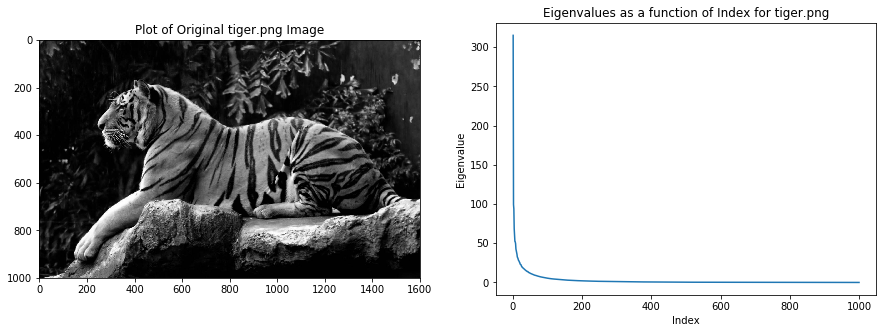

The dimensions of the image matrix are (1000L, 1600L).


In [23]:
eigenvalue_plot('tiger.png')

*<center> Figure 7: Plots showing 'tiger.png' image matrix, its eigenvalue plot and dimensions. </center>*

Looking at the eigenvalue plot, we can see the exponential relationship between the eigenvalue and its index in the array. This shows how rapidly the eigenvalues drop off in the ordered matrix, meaning the majority of the image infomation is held within relatively few values. Now we can consider the impact of reducing the number of eigenvalues on our image compression process. Since we know so few values hold the majority of the information, we can investigate the point at which the balance between quality and size is reached. In Appendix C, plots comparing each of the four images after compression at various eigenvalue cut offs can be found. 

For our two images requiring compression, 'tiger.png' and 'beach.png', we can consider the eigenvalue plots. Since our main priority is to avoid losing as much information as possible, it makes sense to consider cut off values in the flatter sections of the graph - say between 200-1000 in our 'tiger.png' plot above. For example, a cut off point of 500 values would cut the file size in half while avoiding any significant eigenvalues. Of course, beyond this it becomes a consideration of preference. The more we reduce the file size, the more and more we lose more significant eigenvalues and hence information. In Figures C.2 and C.7 in Appendix C, there is a noticeable drop in quality between the plots with 620 and 100 remaining eigenvalues. Below in the solution, we shall attempt to show the best possible balance between quality and file size. Differences between the content and detail of the images, as well as their dimensions, mean that different cut off values are needed to give the best individual solutions. 

For our two images requiring noise reduction, 'code.png' and 'guest.png', it is a slightly different consideration. Here, file size is not important. Instead, we must reduce as much noise as possible while retaining the original information to decipher the image beneath the noise. 



### Final Solution

After finding our desired eigenvalue cut off point, we can now view our results. Below in Figure X, find plots of each of the original given images alongside their compressed counterpart. For the tiger.png and beach.png images, we have reduced the file size by over 50% without compromising image quality. The difference between the images is barely perceptible. For the code.png and guest.png images, we have reduced the noise to a level where the information is more decipherable. We can see that the code.png image shows x and the guest.png image shows a picture of Albert Einstein.


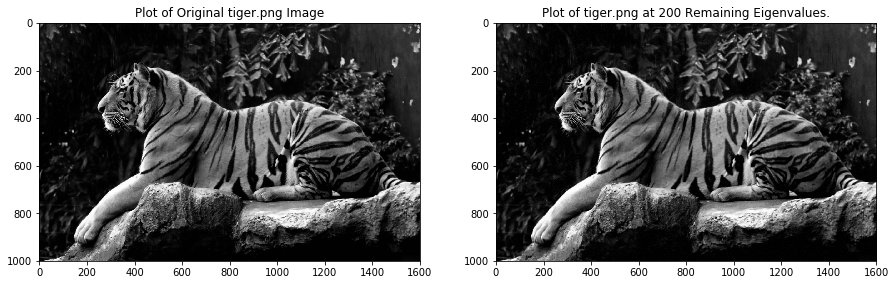

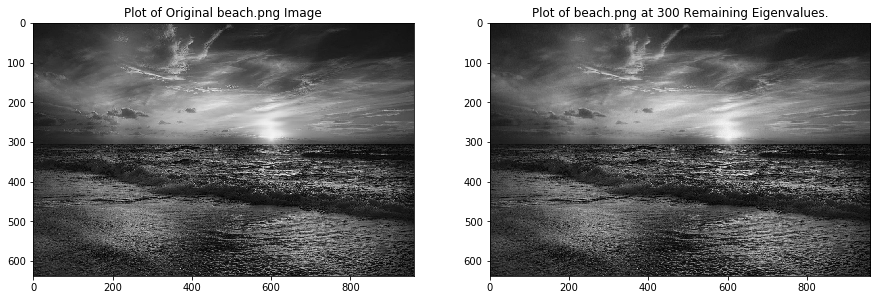

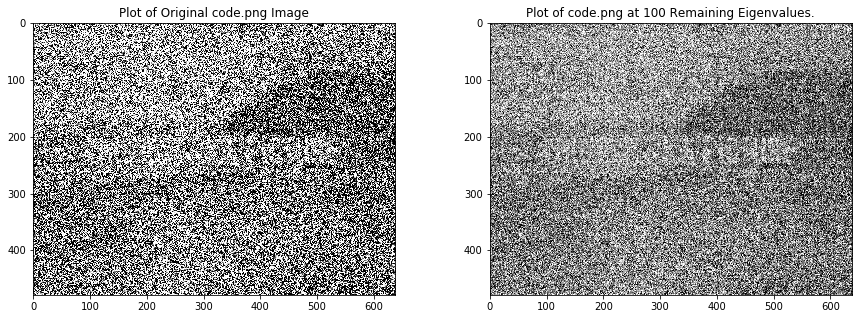

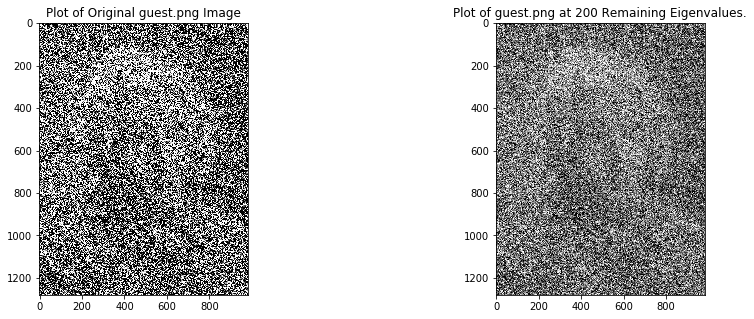

In [34]:
images = ['tiger.png', 'beach.png', 'code.png', 'guest.png']
eigen = [200, 300, 100, 200]
for x in range(4):
    plt.figure()
    plt.subplot(1,2,1)
    image = mpimg.imread(images[x])
    imagebw = rgb2gray(image)
    plt.title('Plot of Original '+ str(images[x]) +' Image')
    plt.imshow(imagebw, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.subplot(1,2,2)
    compression_plot(images[x], eigen[x])

*<center>Figure 8: Plots showing the four images before and after compression at the optimal eigenvalue cut-off </center>*


# Conclusion

<hr>

This report has drawn from the three broad themes of this course - random sampling, numerical differential equations and numerical linear algebra - to carry out real scientific problem solving.  By expanding our understanding of the Python programming language and its potential, we have been able to create new functions and make use of pre-existing libraries to investigate three contrasting problems and generate valid models and solutions for each of them. In the 'travelling salesman' problem, we were able to find a solution for the shortest path between US state capital cities. This was achieved using simulated annealing, based on the Metropolis and Monte Carlo algorithms considered earlier in this course. In the Tacoma bridge problem, we were able to model the displacement and torsion angle of a simplified bridge to see the impact of an external wind on its oscillations. This was achieved using linear interpolation and coupled first order differential equations to create solutions to second order equations. Finally in the image compression problem we created a function to reduce the file size of an image without noticeably losing quality. This was also extended to reduce noise on images. We achieved this using knowledge of linear algebra, in particular SVD. It was shown that there were methods to optimise these solutions by finding the most suitable variables and cut-off points. This investigation has given new depths of understanding in familiar areas of physics by allowing the solution of problems too complex to achieve by hand. 


This report has shown the value of exploring these methods due to their wide applicability to any area of science. Although simplified models cannot perfectly represent a certain situation, it allows for understanding of the physical concepts beneath reality. There is future potential to expand on the solutions provided here, for example by improving code efficiency to allow for quicker execution times or generalising functions to solve broader problems. This report has shown that computational modelling is an increasingly important and relevant area of modern science. The skills gained in this module and in the production of this report will undoubtedly prove useful in the career of a 21st century physicist. 


# Appendices

<hr> 

The following appendices contain additional graphs and code that would be too lengthly for the main report. Appendix A relates to the travelling salesman problem, Appendix B to the Tacoma bridge problem and Appendix C to the image compression problem.

## <center> Appendix A </center>
*<center>Additional results from the travelling salesman problem.</center>*

Below find additional testing for the simulated annealing function. There is a comparison of decay parameters that were not shown in the main report.

### Comparing Decay Parameters

Below in Figure A.1, find log-scale plots showing obtained distance against the temperature for decay parameter $\alpha = $ 0.9, 0.95 and 0.98 for 8 cities.

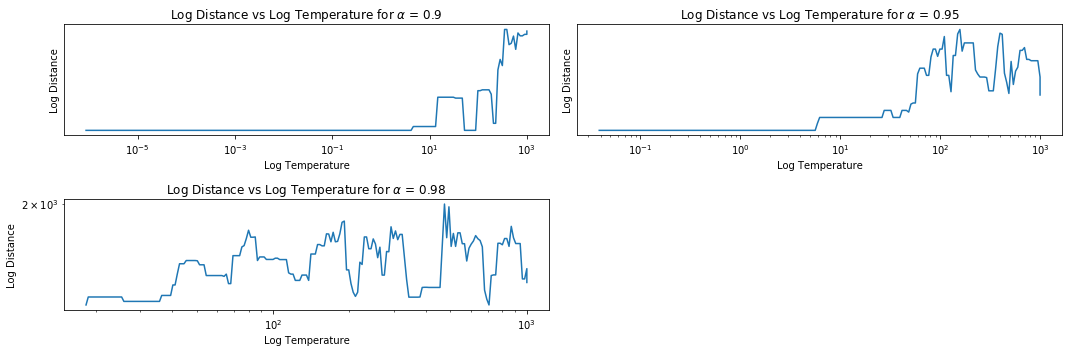

In [113]:
a = [0.9, 0.95, 0.98]
for x in range(0,3):
    plt.subplot(2,2,(x+1))
    temp, distance, path = simulated_annealing(alpha=a[x], N=8)
    plt.title('Log Distance vs Log Temperature for $\\alpha$ = ' + str(a[x]))
    plt.xlabel('Log Temperature')
    plt.xscale('log')
    plt.ylabel('Log Distance')
    plt.yscale('log')
    plt.plot(temp, distance)
plt.tight_layout()

*<center> Figure A.1: Plots showing the obtained distance against temperature using log scales for $\alpha = $ 0.9, 0.95 and 0.98. </center>*

### Comparing Attempts

Below in Figure A.2, find plots comparing the shortest paths found at 200, 500, 1000 and 7000 attempts and the obtained path lengths.

The final shortest path length for 200 attempts is 3697.910724500871.


C:\Users\Study\Anaconda2\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in exp


The final shortest path length for 500 attempts is 2809.0043066827966.
The final shortest path length for 1000 attempts is 2655.590199582835.
The final shortest path length for 7000 attempts is 2330.021054410259.


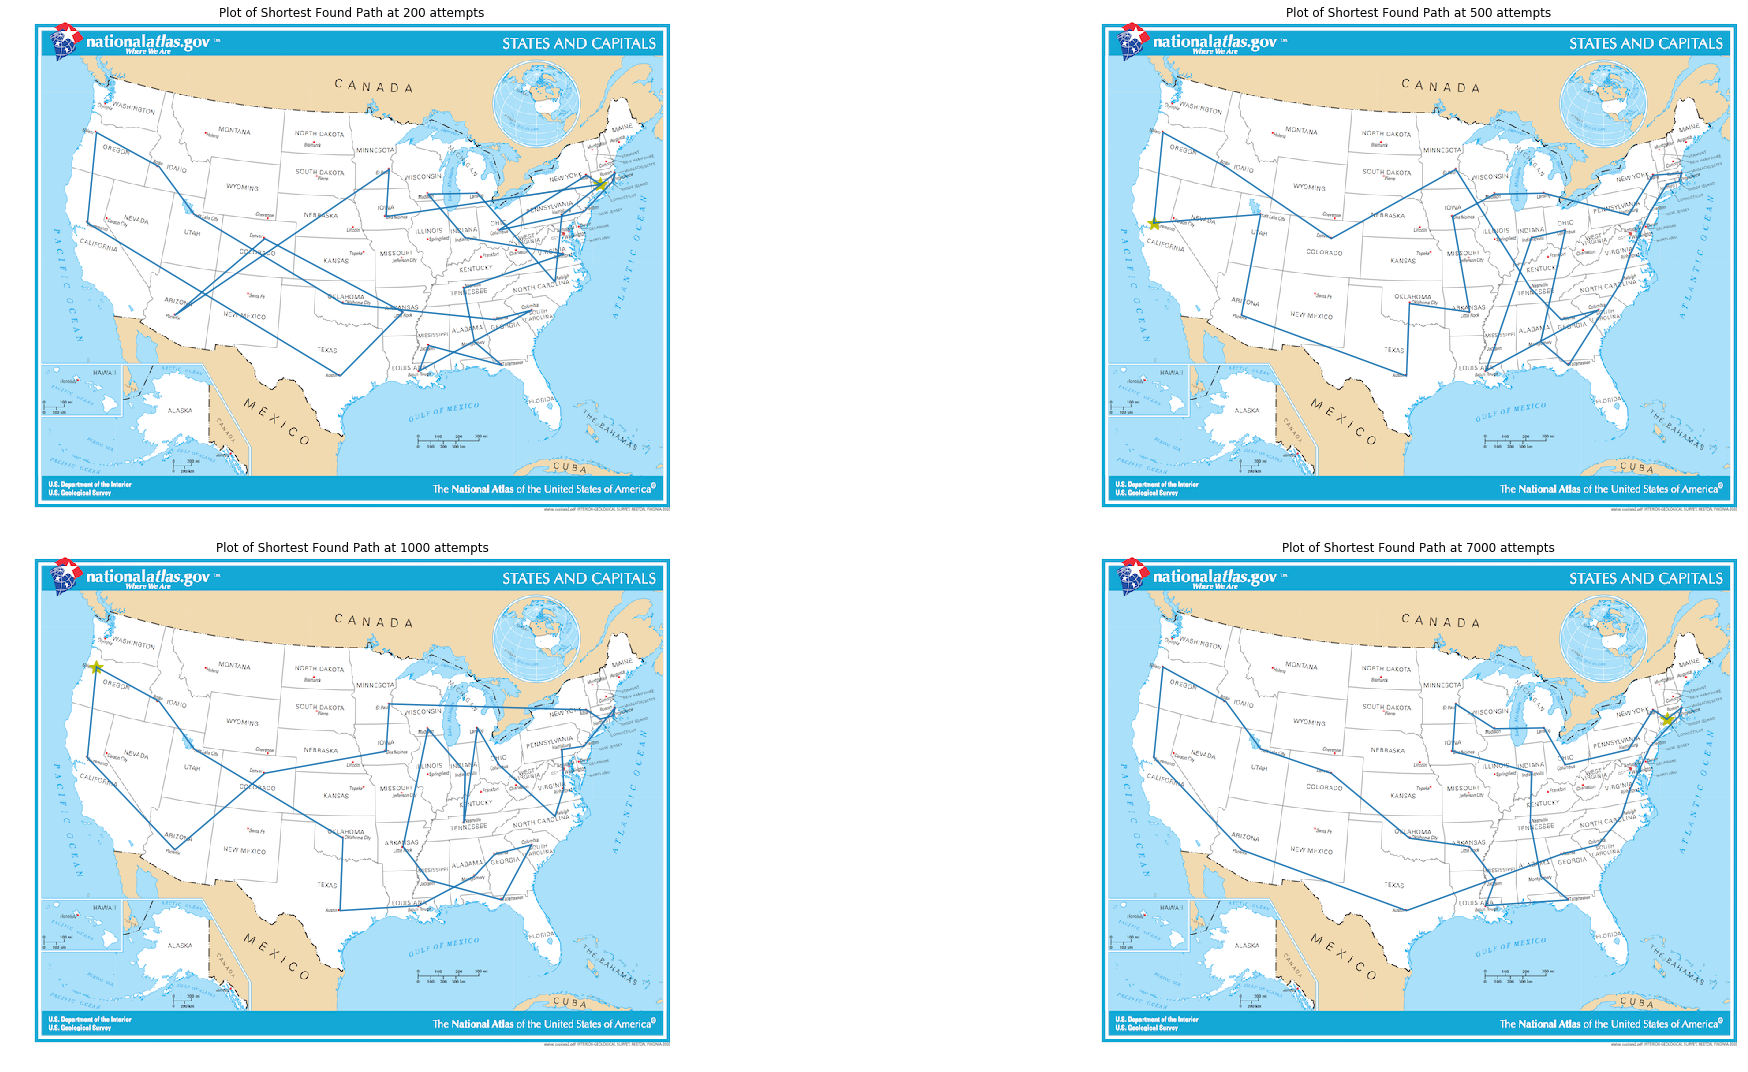

In [134]:
att = [200, 500, 1000, 7000]
for y in range(0,4):
    distances = []
    paths = []
    for x in range(20):
        temp, distance, path = simulated_annealing(N=len(capitals_list),attempts=att[y])
        distances.append(distance[-1])
        paths.append(path)
    best_distance = min(distances)
    best_path = paths[np.argmin(distances)]
    print('The final shortest path length for ' + str(att[y]) + ' attempts is ' + str(best_distance) + '.')  
    plt.subplot(2,2,(y+1))
    plt.title('Plot of Shortest Found Path at ' +str(att[y]) + ' attempts')
    show_path(best_path, best_path[0])
plt.tight_layout()

*<center> Figure A.2: Plots showing the obtained path at different numbers of attempts and print-outs showing the length of the path. </center>*


## <center> Appendix B </center>
*<center>Additional results from the Tacoma bridge problem.</center>*

Below find the additional testing of the impact of different variables on the oscillations in the model. There is a comparison of initial torsion angles, the Cromer and Taylor integration methods, wind amplitudes and wind force frequencies. Analysis of these outputs can be found in the main report.

### Comparing Initial Torsion Angles

Below in Figure B.1, find plots showing the time series of the oscillations for initial torsion angles of $\theta(t=0) =$ 0, 0.01 and 0.1, where there is no external wind force

In [ ]:
th = [0, 0.01, 0.1]
for x in range(len(th)):
    plt.figure()
    times, theta, y = tacoma(theta0=th[x])
    plt.subplot(1,2,1)
    plt.title('Time Series of $y$ for $\\theta(t=0)$ = ' + str(th[x]))
    plt.xlabel('Time')
    plt.ylabel('y')
    plt.plot(times, y)
    plt.subplot(1,2,2)
    plt.plot(times, theta)
    plt.title('Time Series of $\\theta$ for $\\theta(t=0)$ = ' + str(th[x]))
    plt.xlabel('Time')
    plt.ylabel('$\\theta$')

*<center> Figure B.1: Plots showing the time series of $\theta$ and $y$ for initial torsion angles of $\theta(t=0)$ = 0, 0.01 and 0.1, with no external wind force. </center>*

### Comparing Cromer vs Taylor method

Below in Figure B.2, find time-series plots comparing the Cromer/Euler implicit method of solving the differential equations to Taylor's method. This can be used to test the validity of the integrator. 

In [ ]:
plt.subplot(1,2,1)
times, theta, y = tacoma()
plt.title('Time Series of $y$ for Taylor Method')
plt.xlabel('Time')
plt.ylabel('y')
plt.plot(times, y)
plt.subplot(1,2,2)
times, theta, y = tacoma()
plt.title('Time Series of $\\theta$ for Taylor Method')
plt.xlabel('Time')
plt.ylabel('$\\theta$')
plt.plot(times, theta)
plt.figure()
plt.subplot(1,2,1)
times, theta, y = tacoma(cromer=True)
plt.title('Time Series of $\\theta$ for Cromer Method')
plt.xlabel('Time')
plt.ylabel('$\\theta$')
plt.plot(times, y)
plt.subplot(1,2,2)
times, theta, y = tacoma(cromer=True)
plt.title('Time Series of $\\theta$ for Cromer Method')
plt.xlabel('Time')
plt.ylabel('$\\theta$')
plt.plot(times, theta);

*<center> Figure B.2: Plots showing the time series of $\theta$ and $y$ for both the Cromer and Taylor methods of integration, with constant variables. </center>*

### Comparing Wind Amplitudes

Below in Figure B.3, find plots showing the time series of the oscillations at wind amplitudes of $A=1$ and $A=2$.

In [ ]:
for x in range(1,3):
    plt.figure()
    times, theta, y = tacoma(A=x, omega=3)
    plt.subplot(1,2,1)
    plt.title('Time Series of $y$ for $A = $' + str(x))
    plt.xlabel('Time')
    plt.ylabel('y')
    plt.plot(times, y)
    plt.subplot(1,2,2)
    plt.title('Time Series of $\\theta$ for $A = $' + str(x))
    plt.xlabel('Time')
    plt.ylabel('$\\theta$')
    plt.plot(times, theta)

*<center> Figure B.3: Plots showing the time series of $\theta$ and $y$ for both the Cromer and Taylor methods of integration, with constant variables. </center>*

### Comparing Wind Force Frequencies

Below in Figure B.4, find plots showing the time series of the oscillations at a wind amplitude of $A=2$ and wind force frequencies of $\omega = $ 2, 2.5, 2.8 and 3.3. 

In [ ]:
om = [2, 2.5, 2.8, 3.3]
for x in range(len(om)):
    plt.figure()
    times, theta, y = tacoma(A=2, omega=om[x])
    plt.subplot(1,2,1)
    plt.title('Time Series of $y$ for $\omega = $' + str(x))
    plt.xlabel('Time')
    plt.ylabel('y')
    plt.plot(times, y)
    plt.subplot(1,2,2)
    plt.title('Time Series of $\\theta$ for $\omega = $' + str(x))
    plt.xlabel('Time')
    plt.ylabel('$\\theta$')
    plt.plot(times, theta)

*<center> Figure B.4: Plots showing the time series of $\theta$ and $y$ where $A=2$ and $\omega = $ 2, 2.5, 2.8 and 3.3. </center>*

## <center> Appendix C </center>
*<center>Additional results from the image compression problem.</center>*

Below find the additional testing for the other three images given in the problem. For each image, there is a plot of the original image with the eigenvalue plot and image dimensions. Then, there is a test of an appropriate range of remaining eigenvalues, showing the resulting images. The testing of eigenvalues for the 'tiger.png' image can also be found here. The final chosen compressed image can be found in the main report results section.

### Beach Image

Below in Figure C.1, find the original matrix plot, eigenvalue plot and matrix dimensions for the 'beach.png' image. This can be used to consider the best eigenvalue cut-off point. 

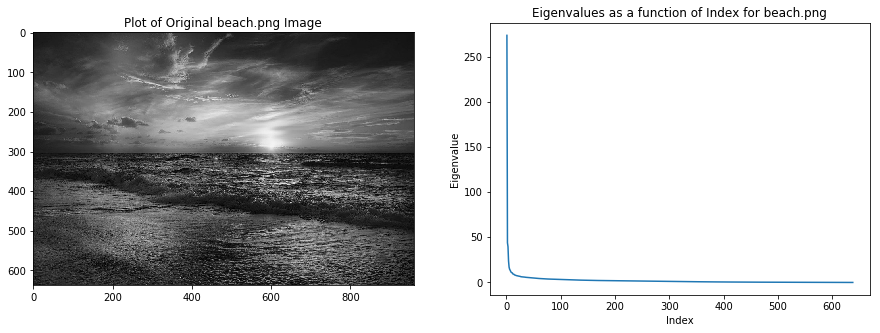

The dimensions of the image matrix are (638L, 960L).


In [25]:
eigenvalue_plot('beach.png')

*<center> Figure C.1: Plots showing 'beach.png' image matrix, its eigenvalue plot and dimensions. </center>*

Below in Figure C.2, find six plots of the 'beach.png' image after undergoing various levels of image compression. Here, we consider the dimensions of the original image matrix and test remaining eigenvalue amounts of 620, 500, 400, 300, 200 and 100. This can be used to find the balance between reducing file size and retaining information.

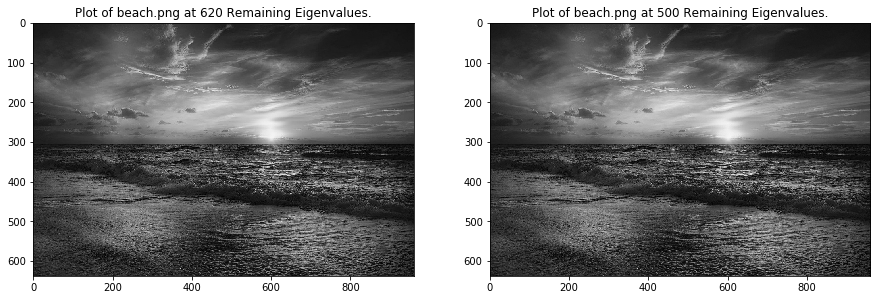

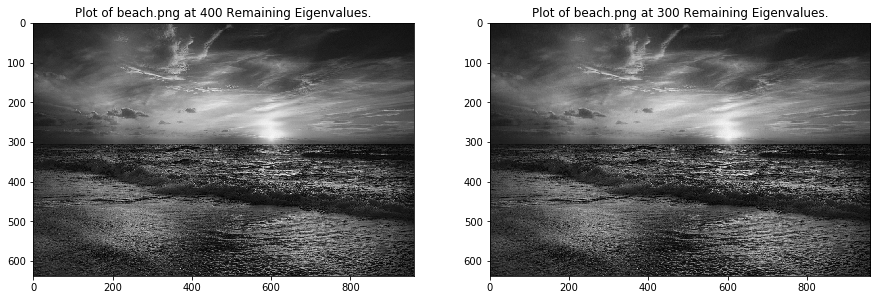

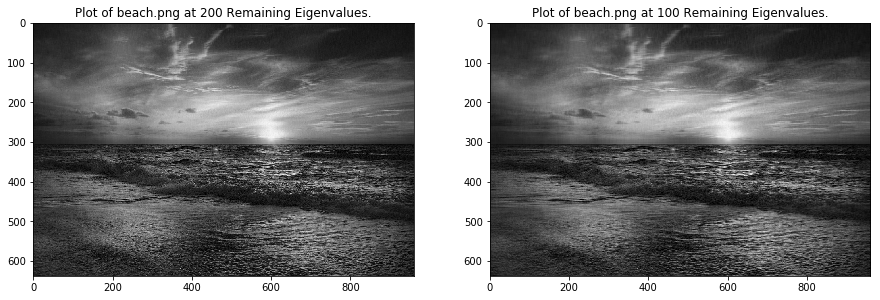

In [26]:
x = [620, 500, 400, 300, 200, 100]
for i in range(0,6,2):
    plt.figure()
    plt.subplot(1,2,1)
    compression_plot(file_name='beach.png', remaining_sigma=x[i])
    plt.subplot(1,2,2)
    compression_plot(file_name='beach.png', remaining_sigma=x[i+1])

*<center>Figure C.2: Six plots of the 'beach.png' image after various levels of compression. </center>*

### Code Image

Below in Figure C.3, find the original matrix plot, eigenvalue plot and matrix dimensions for the 'code.png' image. This can be used to consider the best eigenvalue cut-off point. 

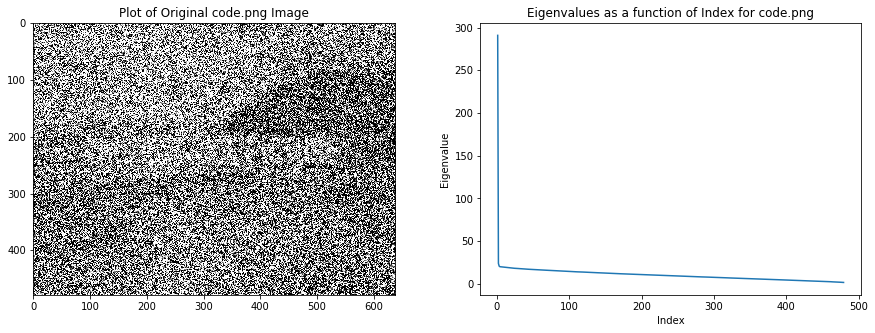

The dimensions of the image matrix are (479L, 638L).


In [27]:
eigenvalue_plot('code.png')

*<center> Figure C.3: Plots showing 'code.png' image matrix, its eigenvalue plot and dimensions. </center>*

Below in Figure C.4, find six plots of the 'code.png' image after undergoing various levels of image compression. Here, we consider the dimensions of the original image matrix and test remaining eigenvalue amounts of 450, 400, 350, 250, 150 and 50. This can be used to find the balance between reducing noise and retaining information.

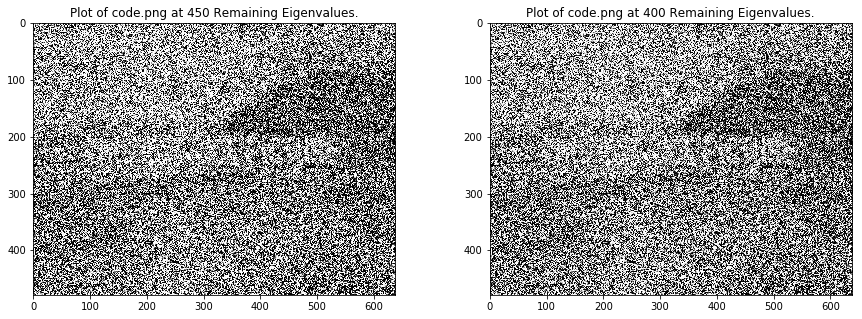

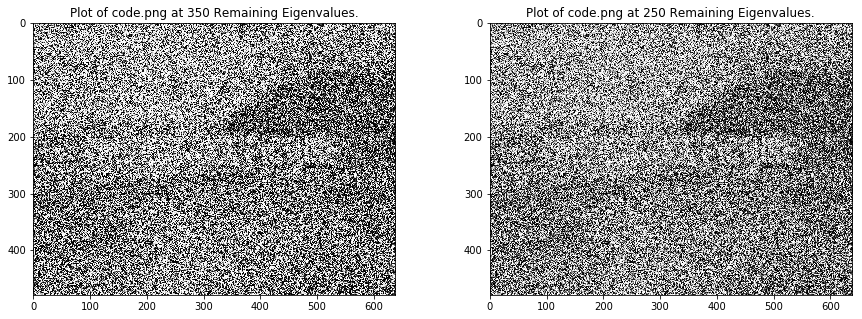

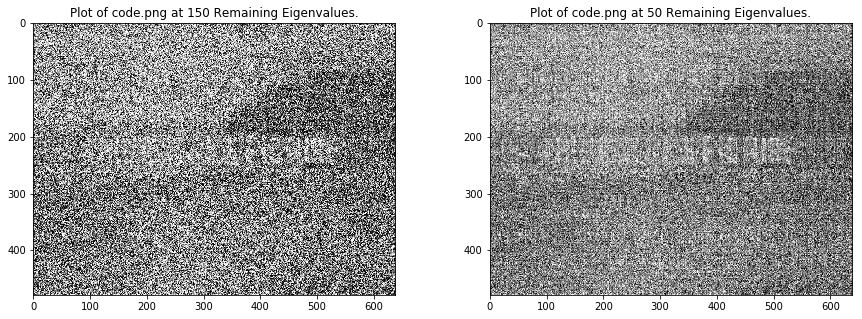

In [28]:
x = [450, 400, 350, 250, 150, 50]
for i in range(0,len(x),2):
    plt.figure()
    plt.subplot(1,2,1)
    compression_plot(file_name='code.png', remaining_sigma=x[i])
    plt.subplot(1,2,2)
    compression_plot(file_name='code.png', remaining_sigma=x[i+1])

*<center>Figure C.4: Six plots of the 'code.png' image after various levels of compression. </center>*

### Guest Image

Below in Figure C.5, find the original matrix plot, eigenvalue plot and matrix dimensions for the 'guest.png' image. This can be used to consider the best eigenvalue cut-off point.

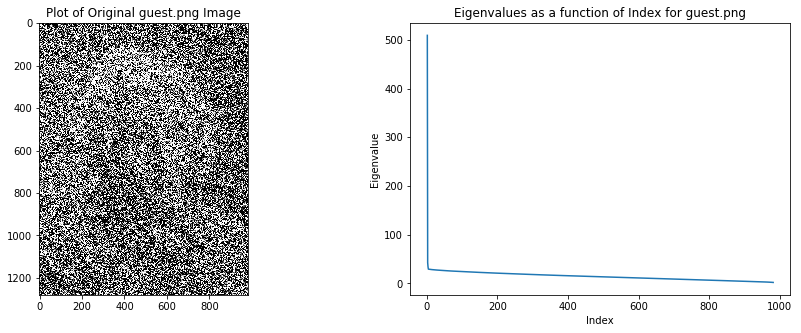

The dimensions of the image matrix are (1280L, 982L).


In [29]:
eigenvalue_plot('guest.png')

*<center> Figure C.5: Plots showing 'guest.png' image matrix, its eigenvalue plot and dimensions. </center>*

Below in Figure C.6, find six plots of the 'guest.png' image after undergoing various levels of image compression. Here, we consider the dimensions of the original image matrix and test remaining eigenvalue amounts of 950, 900, 700, 500, 300 and 100. This can be used to find the balance between reducing noise and retaining information.

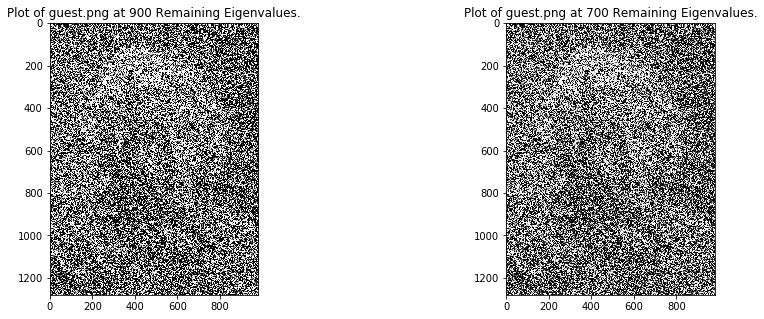

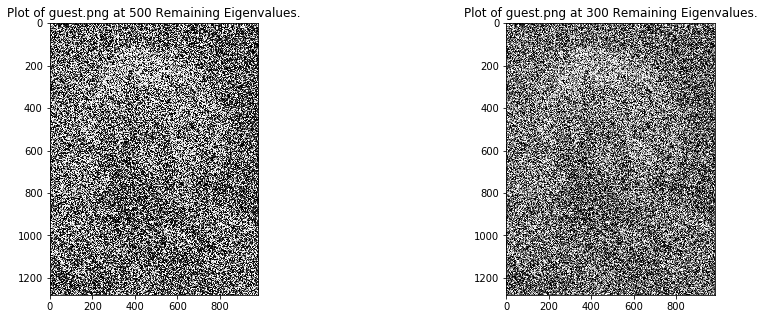

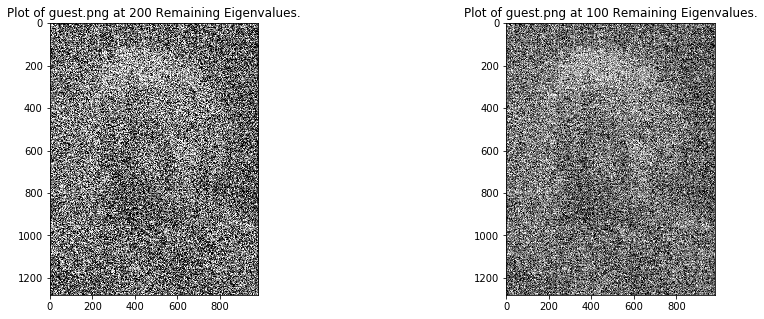

In [51]:
x = [900, 700, 500, 300, 200, 100]
for i in range(0,len(x),2):
    plt.figure()
    plt.subplot(1,2,1)
    compression_plot(file_name='guest.png', remaining_sigma=x[i])
    plt.subplot(1,2,2)
    compression_plot(file_name='guest.png', remaining_sigma=x[i+1])

*<center>Figure C.6: Six plots of the 'guest.png' image after various levels of compression. </center>*

### Tiger Image

Below in Figure C.7, find six plots of the 'tiger.png' image after undergoing various levels of image compression. Here, we consider the dimensions of the original image matrix and test remaining eigenvalue amounts of 620, 500, 400, 300, 200 and 100. This can be used to find the balance between reducing file size and retaining information.

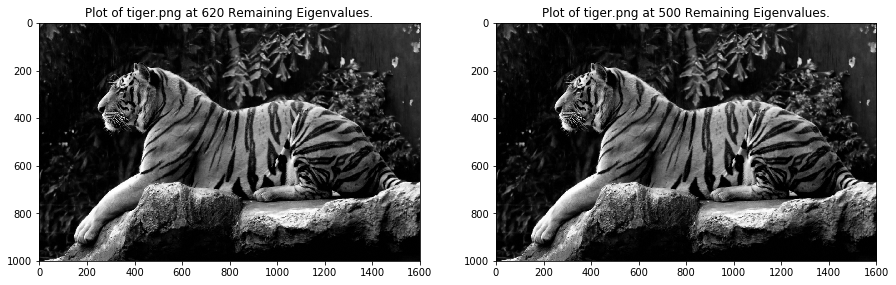

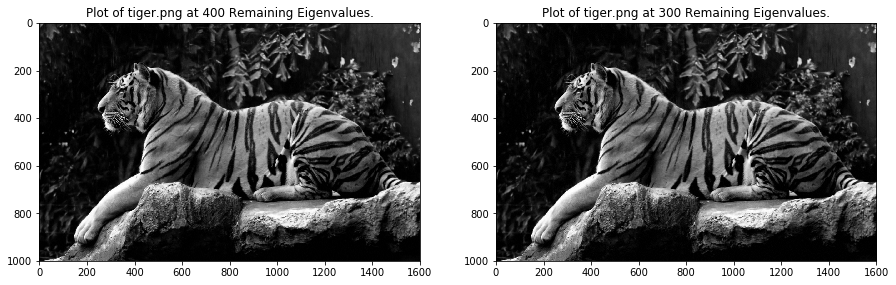

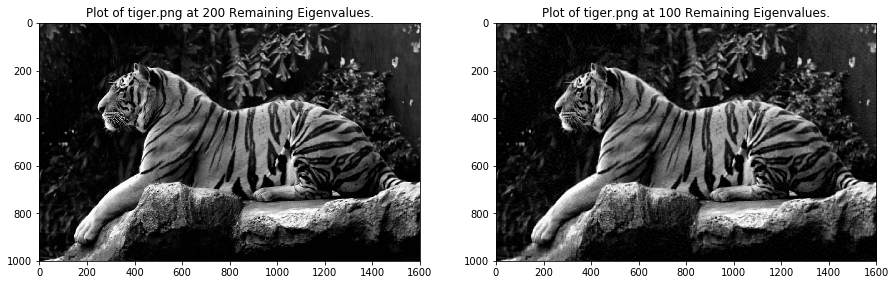

In [31]:
x = [620, 500, 400, 300, 200, 100]
for i in range(0,6,2):
    plt.figure()
    plt.subplot(1,2,1)
    compression_plot(file_name='tiger.png', remaining_sigma=x[i])
    plt.subplot(1,2,2)
    compression_plot(file_name='tiger.png', remaining_sigma=x[i+1])

*<center>Figure C.7: Six plots of the 'tiger.png' image after various levels of compression. </center>*

# References

<hr/>

[1] : J.M. Thijssen, Computational Physics,  2nd ed., (Cambridge University Press, Cambridge, 2013).

[2] : I. Jacques and C. Judd, Numerical Analysis, (Chapman and Hall, London, 1987).

[3] : Government Office for Science, Computational Modelling: Technological Futures, (Government Office for Science, London, 2018).

[4] : M. Sadiku, A. Shadare and S. Musa, INT J ENG SCI. 6, 427 (2017).

[5] : TIOBE - The Software Quality Company, TIOBE Index for January 2020, WWW document, (https://www.tiobe.com/tiobe-index/).

[6] : Python Software Foundation, Quotes about Python, WWW document, (https://www.python.org/about/quotes/).

[7] : W.J. Cook, In Pursuit of the Traveling Salesman : Mathematics at the Limit of Computation, (Princeton University Press, Princeton, 2012).

[8] : G. Reinelt, The Traveling Salesman Computational Solutions for TSP Applications, (Springer, Berlin, 1994).

[9] : Riojajar, Königsberg graph.svg (2006).

[10] : A.P. Punnen, The Traveling Salesman Problem and Its Variations, (Springer, New York, 2002).

[11] : A. Schrijver, A Course in Combinatorial Optimization, (University of Amsterdam, Netherlands, 2017).

[12] : R.W. Eglese, EUR J OPER RES. 46, 271 (1990).

[13] : S. Kirkpatrick, C.D. Gelatt Jr and M.P. Vecchi, SCIENCE. 220(4598), 671 (1983).

[14] : History.com editors, Tacoma Narrows Bridge collapses, WWW document, (https://www.history.com/this-day-in-history/tacoma-narrows-bridge-collapses).

[15] : Washington State Department of Transportation, Eyewitness Accounts of November 7, 1940, WWW document, (https://www.wsdot.wa.gov/tnbhistory/people/eyewitness.htm).

[16] : Washington State Department of Transportation, "Galloping Gertie" Collapses November 7, 1940, WWW document, (https://www.wsdot.wa.gov/TNBhistory/Connections/connections3.htm).

[17] : Unknown, Howard Clifford running off the Tacoma Narrows Bridge during collapse, Tacoma, Washington (1940).

[18] : P.J. McKenna and C. Tuama, AM MATH MON. 108(8), 738 (2001).

[19] : J. Katz and J.T. Jose, Aeroelastic Flutter, WWW document, (https://engineering.jhu.edu/fsag/research/aeroelastic-flutter/).

[20] : Washington State Department of Transportation, Aftermath—Engineering Challenge and the Rise of a New Bridge, WWW document, (https://www.wsdot.wa.gov/tnbhistory/Machine/machine4.htm).

[21] : M. Madhavan, Image Coding Fundamentals, WWW document, (http://videocodecs.blogspot.com/2007/05/image-coding-fundamentals_08.html).

[22] :  M. Rabbani and P.W. Jones, Digital Image Compression Techniques, (Society of Photo-optical Instrumentation Engineers, Bellingham, 1991).

[23] : C. Martin and M.A. Porter, AM MATH MON. 119(10), 838 (2012).

[24] : K.F. Riley, M.P. Hobson and S.J. Bence, Mathematical Methods for Physics and Engineering, 2nd ed., (Cambridge University Press, New York, 2002).

[25] : J.D. Cook, Optimal low-rank matrix approximation, WWW document, (https://www.johndcook.com/blog/2018/05/07/truncated-svd/).